In [1]:
import pandas as pd
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
online_retail = fetch_ucirepo(id=352) 
  
# data (as pandas dataframes) 
ids_df = online_retail.data.ids 
feature_df = online_retail.data.features

In [2]:
print(online_retail.data.features.info())
print(online_retail.data.ids.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 6 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Description  540455 non-null  object 
 1   Quantity     541909 non-null  int64  
 2   InvoiceDate  541909 non-null  object 
 3   UnitPrice    541909 non-null  float64
 4   CustomerID   406829 non-null  float64
 5   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(3)
memory usage: 24.8+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 2 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   InvoiceNo  541909 non-null  object
 1   StockCode  541909 non-null  object
dtypes: object(2)
memory usage: 8.3+ MB
None


In [3]:
#Join table
retail_df = ids_df.join(feature_df)
retail_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [4]:
transc_df = retail_df.copy()

print(transc_df.head())
print(transc_df.info())

  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

      InvoiceDate  UnitPrice  CustomerID         Country  
0  12/1/2010 8:26       2.55     17850.0  United Kingdom  
1  12/1/2010 8:26       3.39     17850.0  United Kingdom  
2  12/1/2010 8:26       2.75     17850.0  United Kingdom  
3  12/1/2010 8:26       3.39     17850.0  United Kingdom  
4  12/1/2010 8:26       3.39     17850.0  United Kingdom  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo   

In [5]:
transc_df.to_csv('online_retail_transactions.csv')

In [6]:
import pandas as pd

#Convert to datetime
transc_df['Date']=pd.to_datetime(transc_df['InvoiceDate'], format = '%m/%d/%Y %H:%M')
#transc_df['Date']=transc_df['Date'].apply(lambda x: x.strftime('%Y-%d-%m %H:%M'))

# Count the unique no of attributes in Retail data
def unique_counts(transc_df):
   for i in transc_df.columns:
       count = transc_df[i].nunique()
       print(i, ": ", count)
unique_counts(transc_df)

InvoiceNo :  25900
StockCode :  4070
Description :  4223
Quantity :  722
InvoiceDate :  23260
UnitPrice :  1630
CustomerID :  4372
Country :  38
Date :  23260


In [7]:
transc_df['Total_Price']=transc_df['Quantity']*transc_df['UnitPrice']
transc_df.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Date,Total_Price
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,2010-12-01 08:26:00,15.30
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,2010-12-01 08:26:00,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,2010-12-01 08:26:00,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,2010-12-01 08:26:00,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,2010-12-01 08:26:00,20.34
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,12/1/2010 8:26,7.65,17850.0,United Kingdom,2010-12-01 08:26:00,15.30
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,12/1/2010 8:26,4.25,17850.0,United Kingdom,2010-12-01 08:26:00,25.50
7,536366,22633,HAND WARMER UNION JACK,6,12/1/2010 8:28,1.85,17850.0,United Kingdom,2010-12-01 08:28:00,11.10
8,536366,22632,HAND WARMER RED POLKA DOT,6,12/1/2010 8:28,1.85,17850.0,United Kingdom,2010-12-01 08:28:00,11.10
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,12/1/2010 8:34,1.69,13047.0,United Kingdom,2010-12-01 08:34:00,54.08


In [8]:
cancelled = transc_df['InvoiceNo'].astype(str).str.contains('C')
cancelled.fillna(0, inplace=True)
cancelled = cancelled.astype(int)
cancelled.value_counts()

InvoiceNo
0    532621
1      9288
Name: count, dtype: int64

In [9]:
transc_df['order_canceled'] = cancelled
transc_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Date,Total_Price,order_canceled
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,2010-12-01 08:26:00,15.30,0
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,2010-12-01 08:26:00,20.34,0
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,2010-12-01 08:26:00,22.00,0
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,2010-12-01 08:26:00,20.34,0
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,2010-12-01 08:26:00,20.34,0


In [10]:
#Filter df for exclude canceled order
n1 = transc_df['order_canceled'].value_counts()[1]
n2 = transc_df.shape[0]
print("Number of cancelled transactions:", n1)
print('Number of orders canceled: {}/{} ({:.2f}%) '.format(n1, n2, n1/n2*100))
transc_df = transc_df[transc_df['order_canceled'] == 0]

Number of cancelled transactions: 9288
Number of orders canceled: 9288/541909 (1.71%) 


In [11]:
# Check for missing values
print("\nMissing Values:")
print(transc_df.isnull().sum())


Missing Values:
InvoiceNo              0
StockCode              0
Description         1454
Quantity               0
InvoiceDate            0
UnitPrice              0
CustomerID        134697
Country                0
Date                   0
Total_Price            0
order_canceled         0
dtype: int64


In [12]:
import numpy as np

#Exclude customer id is NaN
online_retail_df = transc_df[np.isfinite(transc_df['CustomerID'])]

# Check for missing values
print("\nMissing Values:")
print(online_retail_df.isnull().sum())


Missing Values:
InvoiceNo         0
StockCode         0
Description       0
Quantity          0
InvoiceDate       0
UnitPrice         0
CustomerID        0
Country           0
Date              0
Total_Price       0
order_canceled    0
dtype: int64


In [13]:
print("Total number of transaction with negative quantity:", online_retail_df[online_retail_df['Quantity'] <= 0 ]['Quantity'].count())
print("Precentage of transactions with zero or negative quantity" ,round(len(online_retail_df[online_retail_df['Quantity']<=0])/len(online_retail_df)*100, 2),"%")
print("Total number of transaction with negative Price:", online_retail_df[online_retail_df['Total_Price'] <= 0 ]['Total_Price'].count())
print("Precentage of transactions with zero or negative price" ,round(len(online_retail_df[online_retail_df['Total_Price']<=0])/len(online_retail_df)*100, 2),"%")

Total number of transaction with negative quantity: 0
Precentage of transactions with zero or negative quantity 0.0 %
Total number of transaction with negative Price: 40
Precentage of transactions with zero or negative price 0.01 %


In [14]:
final_df = online_retail_df[online_retail_df['Total_Price'] > 0]
final_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Date,Total_Price,order_canceled
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,2010-12-01 08:26:00,15.30,0
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,2010-12-01 08:26:00,20.34,0
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,2010-12-01 08:26:00,22.00,0
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,2010-12-01 08:26:00,20.34,0
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,2010-12-01 08:26:00,20.34,0


In [15]:
print(final_df['Date'].min())
print(final_df['Date'].max())

2010-12-01 08:26:00
2011-12-09 12:50:00


In [16]:
# Convert to show date only
from datetime import datetime
final_df["InvoiceDate"] = pd.to_datetime(final_df["InvoiceDate"], errors='coerce')
final_df["InvoiceDate"] = final_df["InvoiceDate"].dt.date

C:\Users\Galang\AppData\Local\Temp\ipykernel_13824\3268183053.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df["InvoiceDate"] = pd.to_datetime(final_df["InvoiceDate"], errors='coerce')
C:\Users\Galang\AppData\Local\Temp\ipykernel_13824\3268183053.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df["InvoiceDate"] = final_df["InvoiceDate"].dt.date


In [17]:
#Set current date from max Date invoice transaction to calculate recency and frequency
import datetime as dt
NOW = dt.date(2011,12,10)

In [18]:
final_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Date,Total_Price,order_canceled
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01,2.55,17850.0,United Kingdom,2010-12-01 08:26:00,15.30,0
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01,3.39,17850.0,United Kingdom,2010-12-01 08:26:00,20.34,0
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01,2.75,17850.0,United Kingdom,2010-12-01 08:26:00,22.00,0
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01,3.39,17850.0,United Kingdom,2010-12-01 08:26:00,20.34,0
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01,3.39,17850.0,United Kingdom,2010-12-01 08:26:00,20.34,0


In [19]:
#Calculate RFM value of each customer
rfm_table = final_df.groupby('CustomerID').agg({'InvoiceDate': lambda x: (NOW - x.max()).days, 'InvoiceNo': lambda x: len(x),'Total_Price': lambda x: x.sum()}).reset_index()
rfm_table['InvoiceDate'] = rfm_table['InvoiceDate'].astype(int)
rfm_table.rename(columns={'InvoiceDate': 'recency', 
                         'InvoiceNo': 'frequency',
                       'Total_Price': 'monetary_value'}, inplace=True)

In [20]:
rfm_table.head(10)

,CustomerID,recency,frequency,monetary_value
0,12346.0,326,1,77183.60
1,12347.0,3,182,4310.00
2,12348.0,76,31,1797.24
3,12349.0,19,73,1757.55
4,12350.0,311,17,334.40
5,12352.0,37,85,2506.04
6,12353.0,205,4,89.00
7,12354.0,233,58,1079.40
8,12355.0,215,13,459.40
9,12356.0,23,59,2811.43


In [21]:
#Sort df by frequency and monetary value
rfm_table.sort_values(['frequency', 'monetary_value'], ascending=[False, False], inplace=True)
rfm_table.head(10)

,CustomerID,recency,frequency,monetary_value
4010,17841.0,2,7847,40991.57
1879,14911.0,2,5675,143825.06
1289,14096.0,5,5111,65164.79
326,12748.0,1,4595,33719.73
1661,14606.0,2,2700,12156.65
2176,15311.0,1,2379,60767.90
1689,14646.0,2,2076,280206.02
562,13089.0,3,1818,58825.83
690,13263.0,2,1677,7454.07
1434,14298.0,9,1637,51527.30


In [22]:
# Assign range for RFM then calculate R score, F score, and M score using quintiles method. 
# R_variable range from 5 to 1 (in descending order) and R_variable will contain the integers 5, 4, 3, 2, and 1
r_variable = range(5, 0, -1)
f_variable = range(1, 6)
m_variable = range(1, 6)

rfm_table['r_scores'] = pd.qcut(rfm_table['recency'], q = 5, labels = r_variable)
rfm_table['f_scores'] = pd.qcut(rfm_table['frequency'], q = 5, labels = f_variable)
rfm_table['m_scores'] = pd.qcut(rfm_table['monetary_value'], q = 5, labels = m_variable)

In [23]:
# Combines the three individual RFM scores (recency, frequency, and monetary) into a single integer score

rfm_table['rfm_Score'] = rfm_table['r_scores'].astype(str) + rfm_table['f_scores'].astype(str) + rfm_table['m_scores'].astype(str)
rfm_table['rfm_Score'] = rfm_table['rfm_Score'].astype(int)
rfm_table.head(10)

,CustomerID,recency,frequency,monetary_value,r_scores,f_scores,m_scores,rfm_Score
4010,17841.0,2,7847,40991.57,5,5,5,555
1879,14911.0,2,5675,143825.06,5,5,5,555
1289,14096.0,5,5111,65164.79,5,5,5,555
326,12748.0,1,4595,33719.73,5,5,5,555
1661,14606.0,2,2700,12156.65,5,5,5,555
2176,15311.0,1,2379,60767.90,5,5,5,555
1689,14646.0,2,2076,280206.02,5,5,5,555
562,13089.0,3,1818,58825.83,5,5,5,555
690,13263.0,2,1677,7454.07,5,5,5,555
1434,14298.0,9,1637,51527.30,5,5,5,555


In [24]:
rfm_table['r_scores'] = rfm_table['r_scores'].astype(int)
rfm_table['f_scores'] = rfm_table['f_scores'].astype(int)
rfm_table['m_scores'] = rfm_table['m_scores'].astype(int)

In [25]:
def assign_labels(rfm_table, rules, label, colname='rfm_label'):
    for r_rule_range, f_rule_range, m_rule_range in rules:
        rfm_table.loc[
            (rfm_table['r_scores'].between(r_rule_range[0], r_rule_range[1]))
            & (rfm_table['f_scores'].between(f_rule_range[0], f_rule_range[1]))
            & (rfm_table['m_scores'].between(m_rule_range[0], m_rule_range[1])), colname
        ] = label
    return rfm_table

### Customer Segmentation
- Champions : bought recently, buy often and spend the most
- Loyal Customers : spend good money and often, responsive to promotions
- Potential Loyalist : recent customers, but spent a good amount and bought more than once
- New Customers : bought most recently, but not often
- Promising : recent shoppers, but haven’t spent much
- Needing Attention : above average recency, frequency and monetary values; may not have bought very recently though
- About To Sleep : below average recency, frequency and monetary values; will lose them if not reactivated
- At Risk : spent big money and purchased often but long time ago; need to bring them back
- Can't Loose Them : made biggest purchases, and often but haven’t returned for a long time
- Hibernating : last purchase was long back, low spenders and low number of orders

Source : https://www.putler.com/rfm-analysis

In [26]:
# Define the rules as a list of tuples with r, f, and m scores
champ_rules = [
    ((4, 5), (4, 5), (4, 5)) # Recency: 4-5, Frequency: 4-5, Monetary: 4-5
]
loyal_rules = [((2, 5), (3, 5), (3, 5))]
pot_loyal_rules = [((3, 5), (1, 3), (1, 3))]
rec_cust_rules = [((4, 5), (0, 1), (0, 1))]
promis_rules = [((3, 4), (0, 1), (0, 1))]
cust_need_att_rules = [((2, 3), (2, 3), (2, 3))]
to_sleep_rules = [((2, 3), (0, 2), (0, 2))]
to_risk_rules = [((0, 2), (2, 5), (2, 5))]
risk_lose_rules = [((0, 1), (4, 5), (4, 5))]
hibernating_rules = [((1, 2), (1, 2), (1, 2))]
lost_rules = [((0, 2), (0, 2), (0, 2))]

In [27]:
# Initialize the column for labels
rfm_table['rfm_label'] = ''

# Assign the label 'Champions' to the rows matching the rules
rfm_table = assign_labels(rfm_table, champ_rules, 'Champions')
rfm_table = assign_labels(rfm_table, loyal_rules, 'Loyal Customers')
rfm_table = assign_labels(rfm_table, pot_loyal_rules, 'Potential Loyalists')
rfm_table = assign_labels(rfm_table, rec_cust_rules, 'Recent Customers')
rfm_table = assign_labels(rfm_table, promis_rules, 'Promising')
rfm_table = assign_labels(rfm_table, cust_need_att_rules, 'Customer Need Attention')
rfm_table = assign_labels(rfm_table, to_sleep_rules, 'About to Sleep')
rfm_table = assign_labels(rfm_table, to_risk_rules, 'At Risk')
rfm_table = assign_labels(rfm_table, risk_lose_rules, 'Cant Lose Them')
rfm_table = assign_labels(rfm_table, hibernating_rules, 'Hibernating')
rfm_table = assign_labels(rfm_table, lost_rules, 'Lost')

rfm_table.head()

,CustomerID,recency,frequency,monetary_value,r_scores,f_scores,m_scores,rfm_Score,rfm_label
4010,17841.0,2,7847,40991.57,5,5,5,555,Loyal Customers
1879,14911.0,2,5675,143825.06,5,5,5,555,Loyal Customers
1289,14096.0,5,5111,65164.79,5,5,5,555,Loyal Customers
326,12748.0,1,4595,33719.73,5,5,5,555,Loyal Customers
1661,14606.0,2,2700,12156.65,5,5,5,555,Loyal Customers


In [28]:
rfm_table.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4338 entries, 4010 to 3217
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   CustomerID      4338 non-null   float64
 1   recency         4338 non-null   int32  
 2   frequency       4338 non-null   int64  
 3   monetary_value  4338 non-null   float64
 4   r_scores        4338 non-null   int32  
 5   f_scores        4338 non-null   int32  
 6   m_scores        4338 non-null   int32  
 7   rfm_Score       4338 non-null   int32  
 8   rfm_label       4338 non-null   object 
dtypes: float64(2), int32(5), int64(1), object(1)
memory usage: 254.2+ KB


In [29]:
result = rfm_table.groupby('rfm_label').agg({'CustomerID': 'nunique'}).reset_index()
result = result.rename(columns={'CustomerID': 'count'})
result = result.sort_values(by='count', ascending=False)

total_customers = rfm_table['CustomerID'].nunique()

result['percentage'] = (result['count'] / total_customers) * 100
result['percentage'] = result['percentage'].round(2).astype(str) + '%'

result

,rfm_label,count,percentage
6,Loyal Customers,1498,34.53%
5,Lost,864,19.92%
2,At Risk,685,15.79%
7,Potential Loyalists,454,10.47%
0,,286,6.59%
1,About to Sleep,250,5.76%
4,Customer Need Attention,158,3.64%
8,Promising,68,1.57%
3,Cant Lose Them,40,0.92%
9,Recent Customers,35,0.81%


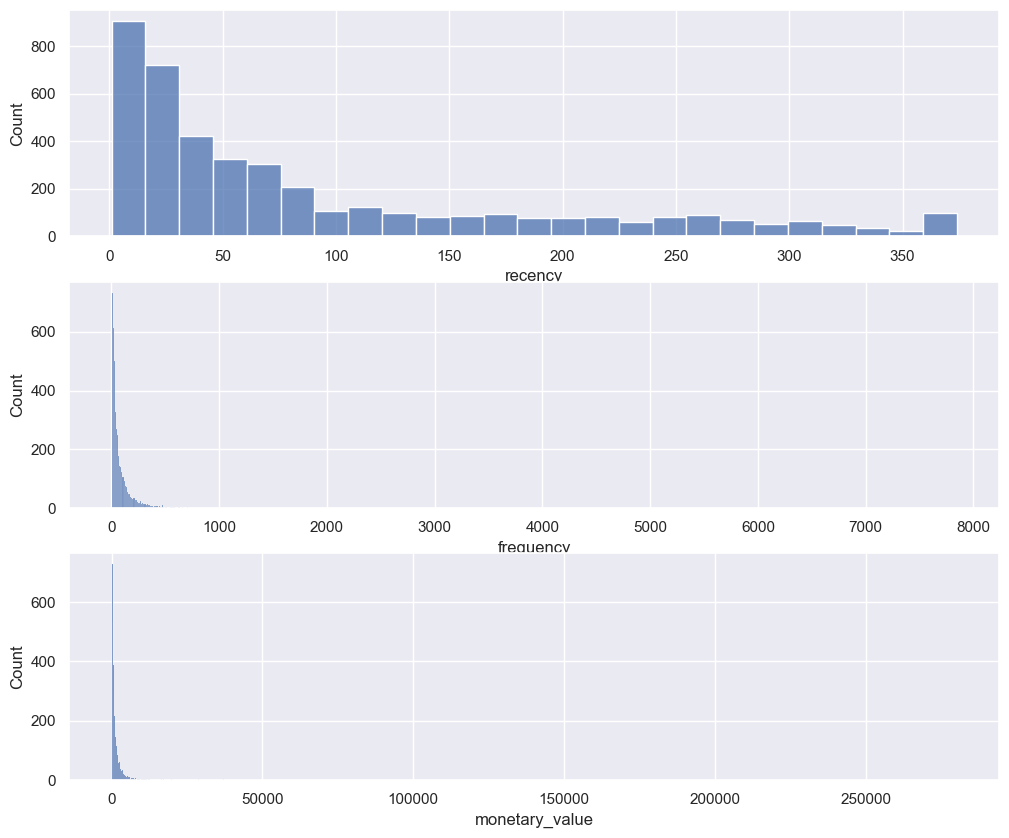

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style='darkgrid')

plt.figure(figsize=(12,10))

# Plot recency distribution
plt.subplot(3, 1, 1); sns.histplot(rfm_table['recency'])

# Plot frequency distribution
plt.subplot(3, 1, 2); sns.histplot(rfm_table['frequency'])

# Plot monetary value distribution
plt.subplot(3, 1, 3); sns.histplot(rfm_table['monetary_value'])

plt.show()

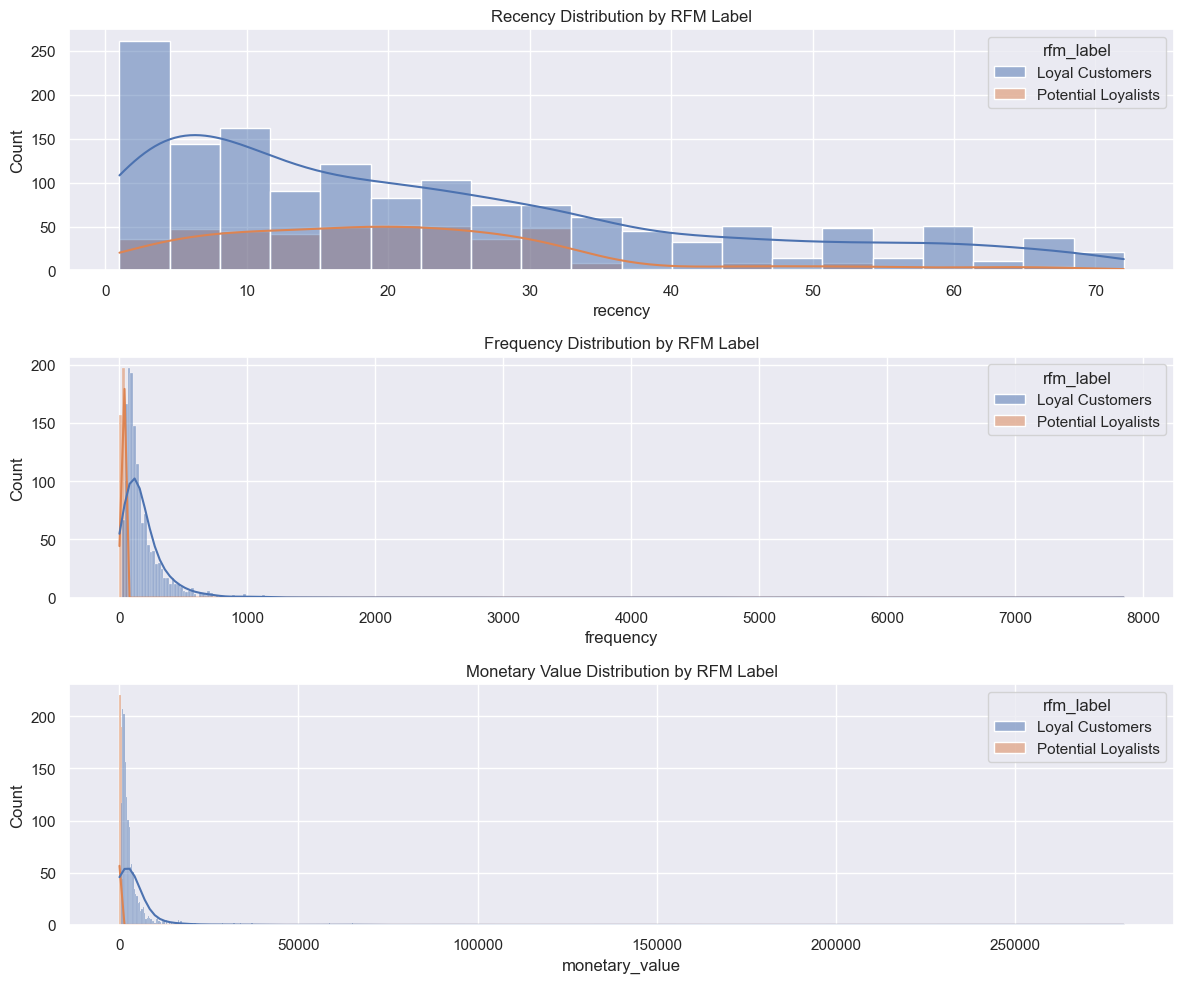

In [31]:
segments = ['Loyal Customers', 'Potential Loyalists']

filtered_rfm_table = rfm_table[rfm_table['rfm_label'].isin(segments)]


plt.figure(figsize=(12, 10))

plt.subplot(3, 1, 1)
sns.histplot(data=filtered_rfm_table, x='recency', hue='rfm_label', kde=True)
plt.title('Recency Distribution by RFM Label')

plt.subplot(3, 1, 2)
sns.histplot(data=filtered_rfm_table, x='frequency', hue='rfm_label', kde=True)
plt.title('Frequency Distribution by RFM Label')

plt.subplot(3, 1, 3)
sns.histplot(data=filtered_rfm_table, x='monetary_value', hue='rfm_label', kde=True)
plt.title('Monetary Value Distribution by RFM Label')

plt.tight_layout()
plt.show()

C:\Users\Galang\AppData\Local\Temp\ipykernel_13824\1419217544.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='rfm_'+rfm_type, data=rfm_table, palette=palette)


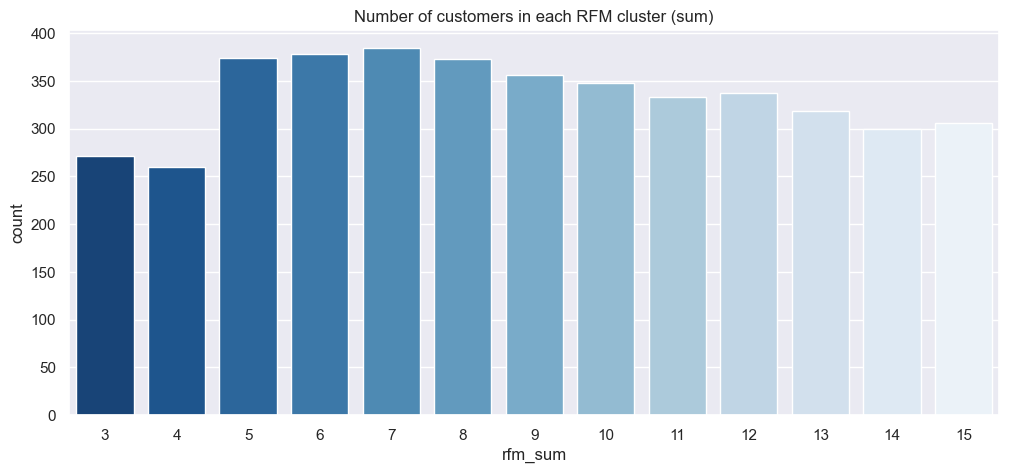

C:\Users\Galang\AppData\Local\Temp\ipykernel_13824\1419217544.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='rfm_'+rfm_type, data=rfm_table, palette=palette)
C:\Users\Galang\AppData\Local\Temp\ipykernel_13824\1419217544.py:7: UserWarning: The palette list has more values (13) than needed (10), which may not be intended.
  sns.countplot(x='rfm_'+rfm_type, data=rfm_table, palette=palette)


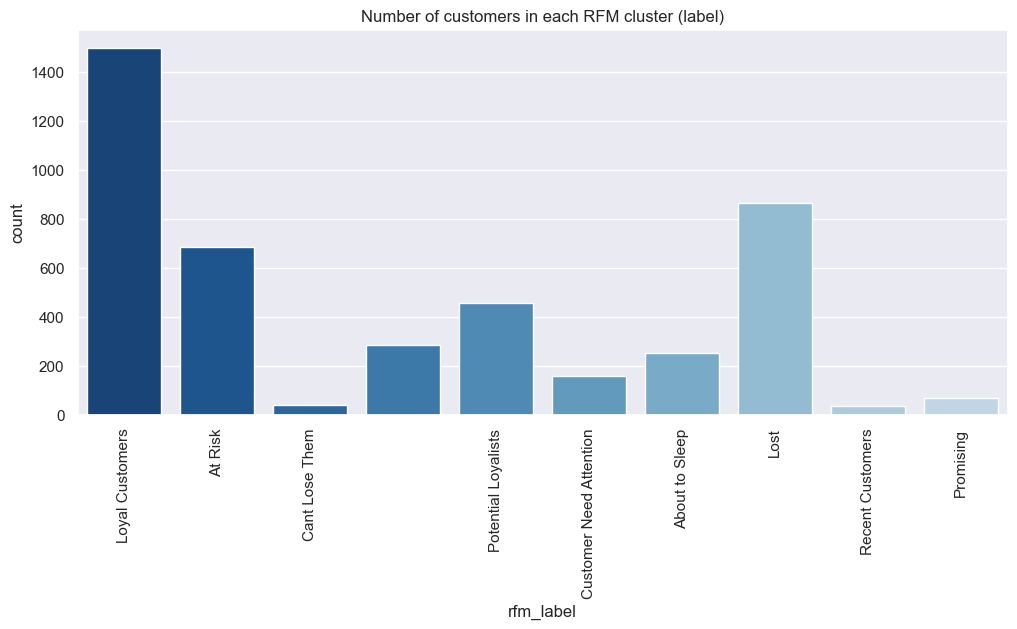

In [32]:
palette = sns.color_palette("Blues_r", n_colors=13)

rfm_table['rfm_sum'] = rfm_table['r_scores'] + rfm_table['f_scores'] + rfm_table['m_scores']

for rfm_type in ['sum', 'label']:
    fig, ax = plt.subplots(figsize=(12,5))
    sns.countplot(x='rfm_'+rfm_type, data=rfm_table, palette=palette)
    ax.set_title('Number of customers in each RFM cluster (%s)' % rfm_type)
    if rfm_type == 'label':
        plt.xticks(rotation=90)
    plt.show()

In [33]:
rfm_table.head()

,CustomerID,recency,frequency,monetary_value,r_scores,f_scores,m_scores,rfm_Score,rfm_label,rfm_sum
4010,17841.0,2,7847,40991.57,5,5,5,555,Loyal Customers,15
1879,14911.0,2,5675,143825.06,5,5,5,555,Loyal Customers,15
1289,14096.0,5,5111,65164.79,5,5,5,555,Loyal Customers,15
326,12748.0,1,4595,33719.73,5,5,5,555,Loyal Customers,15
1661,14606.0,2,2700,12156.65,5,5,5,555,Loyal Customers,15


In [34]:
agg_dict2 = {
    'CustomerID': 'count',
    'recency': 'mean',
    'frequency': 'mean',
    'monetary_value': 'sum'
}

df_analysis = rfm_table.groupby('rfm_label').agg(agg_dict2).sort_values(by='recency').reset_index()
df_analysis.rename({'rfm_label': 'label', 'CustomerID': 'count'}, axis=1, inplace=True)
df_analysis['count_share'] = df_analysis['count'] / df_analysis['count'].sum()
df_analysis['monetary_share'] = df_analysis['monetary_value'] / df_analysis['monetary_value'].sum()
df_analysis['monetary'] = df_analysis['monetary_value'] / df_analysis['count']

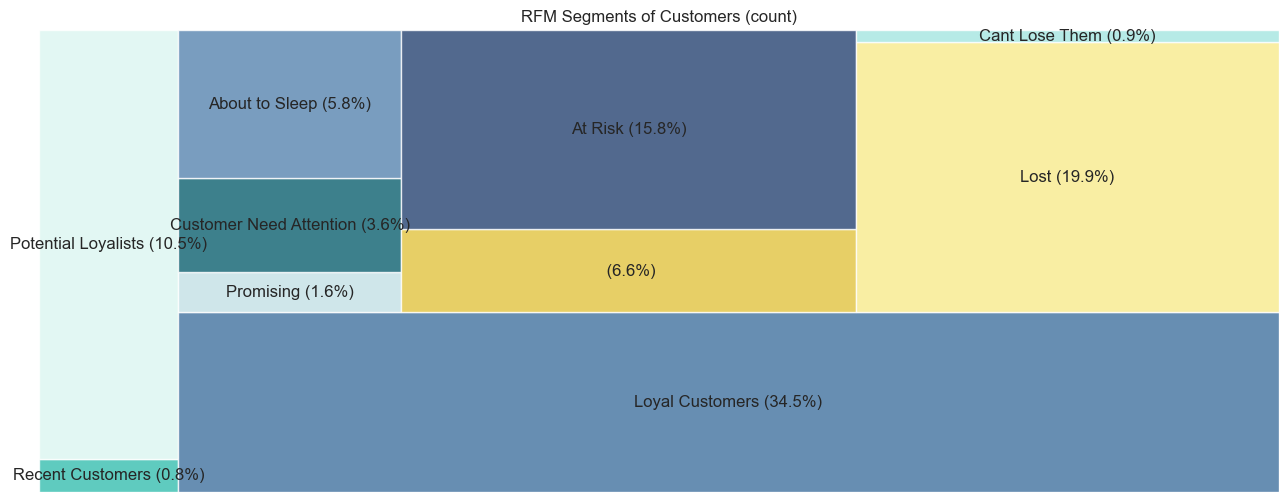

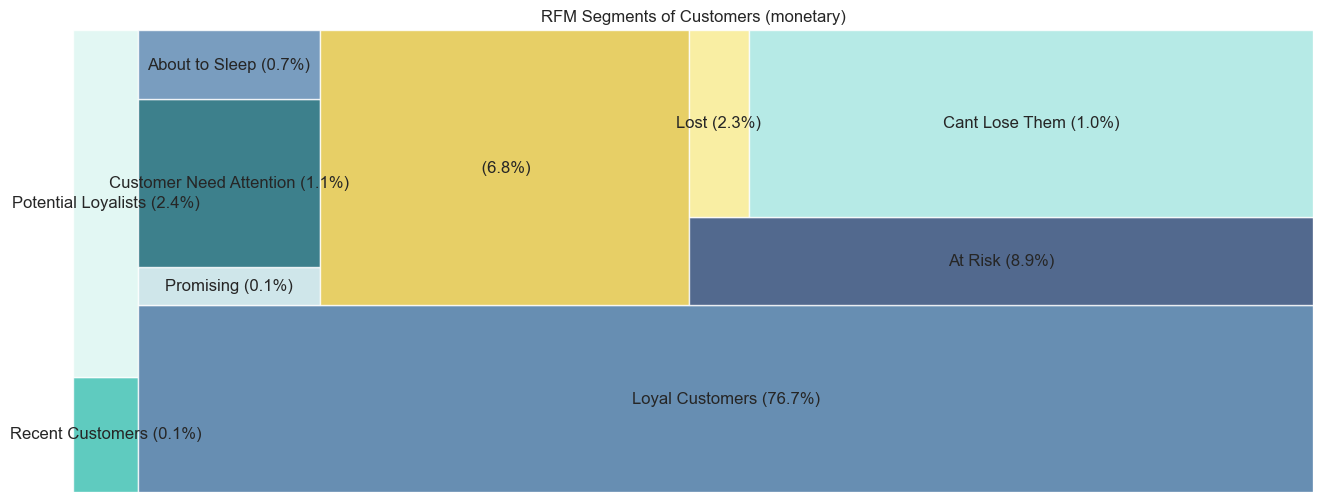

In [35]:
import squarify

colors = ['#37BEB0', '#DBF5F0', '#41729F', '#C3E0E5', '#0C6170', '#5885AF', '#E1C340', '#274472', '#F8EA8C', '#A4E5E0', '#1848A0']

for col in ['count', 'monetary']:
    labels = df_analysis['label'] + df_analysis[col + '_share'].apply(lambda x: ' ({0:.1f}%)'.format(x*100))

    fig, ax = plt.subplots(figsize=(16,6))
    squarify.plot(sizes=df_analysis[col], label=labels, alpha=.8, color=colors)
    ax.set_title('RFM Segments of Customers (%s)' % col)
    plt.axis('off')
    plt.show()

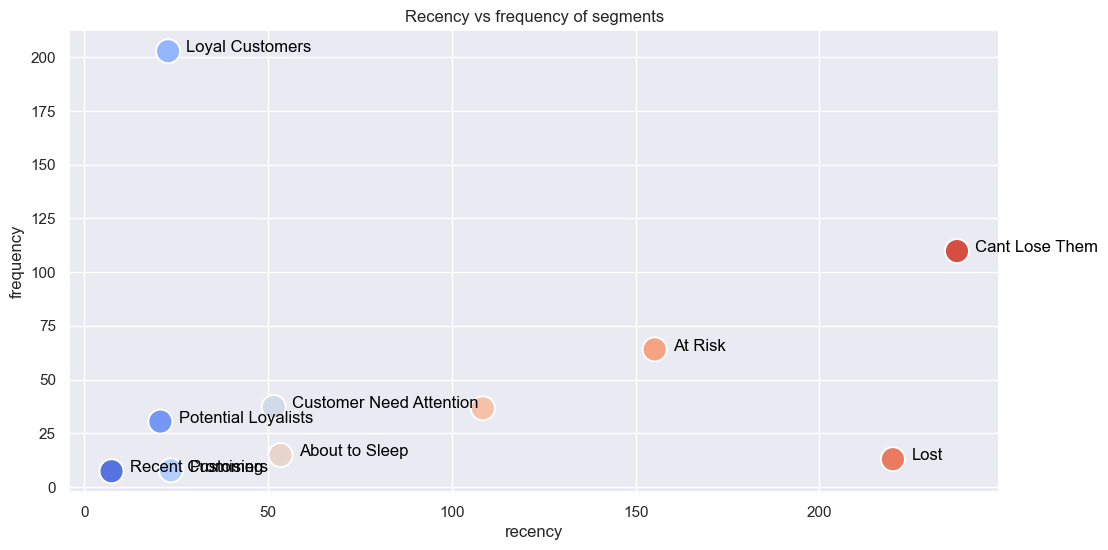

In [36]:
palette = sns.color_palette("coolwarm", 10)

fig, ax = plt.subplots(figsize=(12,6))
plot = sns.scatterplot(x='recency', y='frequency', data=df_analysis, hue='label', s=300, palette=palette)

for i in range(len(df_analysis)):
     plot.text(df_analysis['recency'][i]+5,
               df_analysis['frequency'][i]-0.5,
               df_analysis['label'][i],
               horizontalalignment='left',
               size='medium', color='black')

ax.set_title('Recency vs frequency of segments')
ax.get_legend().remove()
plt.show()